<a href="https://colab.research.google.com/github/vikas-hkk/Lild4o0d8/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = "/content/drive/MyDrive/Pneumonia/Pneumonia.zip" # Make sure this path is correct

print(f"Contents of the zip file '{os.path.basename(zip_path)}':")

# Check if the zip file exists
if os.path.exists(zip_path):
    try:
        # Open the zip file in read mode
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Get a list of all the contents (files and directories)
            contents = zip_ref.namelist()

            # Print each item
            for item in contents:
                print(item)

    except zipfile.BadZipFile:
        print(f"Error: '{zip_path}' is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"Error: The zip file '{zip_path}' was not found.")

Contents of the zip file 'Pneumonia.zip':
Pneumonia/
Pneumonia/chest_xray/
Pneumonia/chest_xray/test/
Pneumonia/chest_xray/test/NORMAL/
Pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0005-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0006-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0007-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0009-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0010-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0011-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0013-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0015-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0016-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0017-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0019-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-0021-0001.jpeg
Pneumonia/chest_xray/test/NORMAL/IM-00

In [ ]:
    pip install Pillow matplotlib numpy

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import zipfile
import os

# Path to your zip file
zip_path = "/content/drive/MyDrive/Pneumonia/Pneumonia.zip" # Make sure this path is correct
# Directory to extract the contents
extracted_dir = "/content/weight" # This is where the unzipped files will go

print(f"Contents of the zip file '{os.path.basename(zip_path)}' before extraction:")

# Check if the zip file exists and list its contents
if os.path.exists(zip_path):
    try:
        # Open the zip file in read mode
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Get a list of all the contents (files and directories)
            contents = zip_ref.namelist()

            # Print each item
            for item in contents:
                print(item)

    except zipfile.BadZipFile:
        print(f"Error: '{zip_path}' is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred while listing zip contents: {e}")
else:
    print(f"Error: The zip file '{zip_path}' was not found.")

# %%
# Create the extraction directory if it doesn't exist
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Extract the zip file
print(f"\nExtracting {zip_path} to {extracted_dir}...")
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print("Extraction complete.")
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_path}")
except zipfile.BadZipFile:
    print(f"Error: {zip_path} is not a valid zip file or is corrupted.")
except Exception as e:
    print(f"An unexpected error occurred during extraction: {e}")


# %%
# --- Set base_dir to the *extracted* directory for subsequent operations ---
base_dir = extracted_dir

# Verify extracted contents (optional, but good practice)
print(f"\nContents of the extracted directory '{base_dir}':")
if os.path.exists(base_dir):
    for item in os.listdir(base_dir):
        print(item)
else:
    print(f"Error: Extracted directory '{base_dir}' not found.")

# %%
# Ensure required libraries for EDA are installed
# Use the magic command %pip or !pip in notebooks
try:
    get_ipython().run_line_magic('pip', 'install Pillow matplotlib numpy')
except:
    # Fallback for environments where %pip is not available
    print("Could not use %pip. Attempting with !pip...")
    os.system('pip install Pillow matplotlib numpy')

# %%
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# base_dir is already set to the extracted directory from the previous cell

subsets = ["test", "train", "val"]
classes = ["NORMAL", "PNEUMONIA"]

print("\n--- Image EDA ---")

# 1. Check Image Dimensions (Shape)
print("\n## Image Dimensions per Class and Subset")
all_shapes = {}
for subset in subsets:
    all_shapes[subset] = {}
    print(f"\n--- {subset.upper()} ---")
    for cls in classes:
        class_dir = os.path.join(base_dir, subset, cls)
        if os.path.isdir(class_dir):
            # Filter for files, ignoring directories or hidden files if necessary
            image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f)) and not f.startswith('.')]
            shapes = []
            processed_count = 0
            for img_file in image_files:
                img_path = os.path.join(class_dir, img_file)
                try:
                    with Image.open(img_path) as img:
                        shapes.append(img.size) # size gives (width, height)
                    processed_count += 1
                except Exception as e:
                    print(f"Could not open or process image {img_path}: {e}")
            all_shapes[subset][cls] = shapes
            if shapes:
                shape_counts = Counter(shapes)
                print(f"{cls}: {processed_count} valid images out of {len(image_files)}. Most common shapes: {shape_counts.most_common(3)}")
            else:
                 print(f"{cls}: No valid images found in {len(image_files)} files listed.")
        else:
            print(f"Warning: Directory not found: {class_dir}")

# Optional: Visualize shape distribution for a subset (e.g., train)
print("\n## Visualizing Training Set Image Dimensions")
train_shapes = []
for cls in classes:
    if 'train' in all_shapes and cls in all_shapes['train']:
        train_shapes.extend(all_shapes['train'][cls])

if train_shapes:
    widths = [shape[0] for shape in train_shapes]
    heights = [shape[1] for shape in train_shapes]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=50)
    plt.title("Distribution of Image Widths (Train Set)")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=50)
    plt.title("Distribution of Image Heights (Train Set)")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()
else:
    print("No training image shapes to visualize.")

# 2. Check Image Color Mode (e.g., RGB, Grayscale)
print("\n## Image Color Mode per Class and Subset")
for subset in subsets:
    print(f"\n--- {subset.upper()} ---")
    for cls in classes:
        class_dir = os.path.join(base_dir, subset, cls)
        if os.path.isdir(class_dir):
            image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f)) and not f.startswith('.')]
            modes = []
            processed_count = 0
            for img_file in image_files:
                img_path = os.path.join(class_dir, img_file)
                try:
                    with Image.open(img_path) as img:
                        modes.append(img.mode)
                    processed_count += 1
                except Exception as e:
                    # Error message already printed during shape check if it failed to open
                    pass # Skip printing error again
            if modes:
                mode_counts = Counter(modes)
                print(f"{cls}: {processed_count} valid images out of {len(image_files)}. Color modes: {dict(mode_counts)}")
            # else: Handled by shape check already if no valid images were found
        # else: Handled by shape check already

# 3. (Optional) Check for Corrupted/Invalid Images
# The try-except blocks in the above loops already help identify images that Pillow can't open.
# The counts printed now distinguish between total files listed and valid images processed.

# 4. Display Sample Images with Labels
print("\n## Sample Images")
num_samples_per_class = 3 # Number of sample images to display per class
plt.figure(figsize=(10, 5 * len(classes))) # Adjust figure size based on number of classes

for i, cls in enumerate(classes):
    class_train_dir = os.path.join(base_dir, "train", cls)
    if os.path.isdir(class_train_dir):
        # Filter for files and take samples
        image_files = [f for f in os.listdir(class_train_dir) if os.path.isfile(os.path.join(class_train_dir, f)) and not f.startswith('.')]
        # Take up to num_samples_per_class, handling cases with fewer files
        sample_images = image_files[:min(num_samples_per_class, len(image_files))]

        for j, img_file in enumerate(sample_images):
            img_path = os.path.join(class_train_dir, img_file)
            ax = plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
            try:
                img = Image.open(img_path)
                ax.imshow(img)
                ax.set_title(f"{cls}\n({img.size[0]}x{img.size[1]}, {img.mode})", fontsize=8)
                ax.axis("off")
                img.close() # Close the image file
            except Exception as e:
                print(f"Could not display sample image {img_path}: {e}")
                ax.set_title(f"Error loading {cls} sample", fontsize=8)
                ax.axis("off")

plt.tight_layout()
plt.show()

Streaming output truncated to the last 5000 lines.
Pneumonia/chest_xray/train/NORMAL/IM-0483-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0484-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0485-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0486-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0487-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0488-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0489-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0490-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0491-0001-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0491-0001-0002.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0491-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0492-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0493-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0494-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0495-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0496-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0497-0001-0001.jpeg
Pneumonia/chest_xray/train/NORMAL/IM-0497-0001-000

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import os
import random
import shutil # Needed for deleting files

# Assuming base_dir is set to your extracted dataset directory
# Example: base_dir = "/content/Pneumonia_extracted/Pneumonia/chest_xray"

train_dir = os.path.join(base_dir, "train")
normal_train_dir = os.path.join(train_dir, "NORMAL")
pneumonia_train_dir = os.path.join(train_dir, "PNEUMONIA")

# --- Get image counts ---
normal_images = [f for f in os.listdir(normal_train_dir) if os.path.isfile(os.path.join(normal_train_dir, f)) and not f.startswith('.')]
pneumonia_images = [f for f in os.listdir(pneumonia_train_dir) if os.path.isfile(os.path.join(pneumonia_train_dir, f)) and not f.startswith('.')]

num_normal_train = len(normal_images)
num_pneumonia_train = len(pneumonia_images)

print(f"Original Train set counts:")
print(f"  Normal: {num_normal_train} images")
print(f"  PNEUMONIA: {num_pneumonia_train} images")

# --- Perform Downsampling if needed ---
if num_pneumonia_train > num_normal_train:
    print("\nDownsampling PNEUMONIA class in the training set...")

    # Calculate how many images to remove
    num_to_remove = num_pneumonia_train - num_normal_train
    print(f"Need to remove {num_to_remove} images from PNEUMONIA training set.")

    # Randomly select images to remove
    images_to_remove = random.sample(pneumonia_images, num_to_remove)

    # Remove the selected images
    print("Removing images...")
    for img_file in images_to_remove:
        img_path = os.path.join(pneumonia_train_dir, img_file)
        try:
            os.remove(img_path)
            # Optional: print which files are being removed (can be verbose)
            # print(f"Removed: {img_path}")
        except Exception as e:
            print(f"Error removing {img_path}: {e}")

    print("Downsampling complete.")

    # --- Verify new counts ---
    remaining_pneumonia_images = [f for f in os.listdir(pneumonia_train_dir) if os.path.isfile(os.path.join(pneumonia_train_dir, f)) and not f.startswith('.')]
    num_pneumonia_train_after = len(remaining_pneumonia_images)

    print("\nTrain set counts after downsampling:")
    print(f"  Normal: {num_normal_train} images") # Normal count remains the same
    print(f"  PNEUMONIA: {num_pneumonia_train_after} images")

    if num_pneumonia_train_after == num_normal_train:
        print("Training set is now balanced.")
    else:
         print("Warning: Training set counts are still not equal.")

import os
import random
import shutil # Needed for deleting files

# Assuming base_dir is set to your extracted dataset directory
# Example: base_dir = "/content/Pneumonia_extracted/Pneumonia/chest_xray"

train_dir = os.path.join(base_dir, "train")
normal_train_dir = os.path.join(train_dir, "NORMAL")
pneumonia_train_dir = os.path.join(train_dir, "PNEUMONIA")

# --- Get image counts ---
normal_images = [f for f in os.listdir(normal_train_dir) if os.path.isfile(os.path.join(normal_train_dir, f)) and not f.startswith('.')]
pneumonia_images = [f for f in os.listdir(pneumonia_train_dir) if os.path.isfile(os.path.join(pneumonia_train_dir, f)) and not f.startswith('.')]

num_normal_train = len(normal_images)
num_pneumonia_train = len(pneumonia_images)

print(f"Original Train set counts:")
print(f"  Normal: {num_normal_train} images")
print(f"  PNEUMONIA: {num_pneumonia_train} images")

# --- Perform Downsampling if needed ---
if num_pneumonia_train > num_normal_train:
    print("\nDownsampling PNEUMONIA class in the training set...")

    # Calculate how many images to remove
    num_to_remove = num_pneumonia_train - num_normal_train
    print(f"Need to remove {num_to_remove} images from PNEUMONIA training set.")

    # Randomly select images to remove
    images_to_remove = random.sample(pneumonia_images, num_to_remove)

    # Remove the selected images
    print("Removing images...")
    for img_file in images_to_remove:
        img_path = os.path.join(pneumonia_train_dir, img_file)
        try:
            os.remove(img_path)
            # Optional: print which files are being removed (can be verbose)
            # print(f"Removed: {img_path}")
        except Exception as e:
            print(f"Error removing {img_path}: {e}")

    print("Downsampling complete.")

    # --- Verify new counts ---
    remaining_pneumonia_images = [f for f in os.listdir(pneumonia_train_dir) if os.path.isfile(os.path.join(pneumonia_train_dir, f)) and not f.startswith('.')]
    num_pneumonia_train_after = len(remaining_pneumonia_images)

    print("\nTrain set counts after downsampling:")
    print(f"  Normal: {num_normal_train} images") # Normal count remains the same
    print(f"  PNEUMONIA: {num_pneumonia_train_after} images")

    if num_pneumonia_train_after == num_normal_train:
        print("Training set is now balanced.")
    else:
         print("Warning: Training set counts are still not equal.")


else:
    print("\nNo downsampling needed for the training set (PNEUMONIA count is not greater than Normal count).")

Original Train set counts:
  Normal: 1341 images
  PNEUMONIA: 3875 images

Downsampling PNEUMONIA class in the training set...
Need to remove 2534 images from PNEUMONIA training set.
Removing images...
Downsampling complete.

Train set counts after downsampling:
  Normal: 1341 images
  PNEUMONIA: 1341 images
Training set is now balanced.
Original Train set counts:
  Normal: 1341 images
  PNEUMONIA: 1341 images

No downsampling needed for the training set (PNEUMONIA count is not greater than Normal count).


In [ ]:
import os
from PIL import Image
import time # To estimate processing time

# Assuming base_dir is set to your extracted dataset directory
# Example: base_dir = "/content/Pneumonia_extracted/Pneumonia/chest_xray"

train_dir = os.path.join(base_dir, "train")
normal_train_dir = os.path.join(train_dir, "NORMAL")
pneumonia_train_dir = os.path.join(train_dir, "PNEUMONIA")

classes = ["NORMAL", "PNEUMONIA"]

# --- Define the target dimensions ---
target_size = (224, 224) # (width, height) - common size, adjust if needed

print(f"--- Resizing Images in Training Set to {target_size} ---")

for cls in classes:
    class_dir = os.path.join(train_dir, cls)
    print(f"\nProcessing images in: {class_dir}")

    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f)) and not f.startswith('.')]
        processed_count = 0
        error_count = 0
        start_time = time.time()

        for i, img_file in enumerate(image_files):
            img_path = os.path.join(class_dir, img_file)

            # Optional: print progress every N images
            if (i + 1) % 100 == 0:
                print(f"  Processed {i + 1}/{len(image_files)} images in {cls}...")

            try:
                # Open the image
                img = Image.open(img_path)

                # Check if resizing is necessary
                if img.size != target_size:
                    # Resize the image
                    # Image.ANTIALIAS is a high-quality downsampling filter
                    # Use Image.LANCZOS or Image.BICUBIC for potentially better results
                    # Use Image.NEAREST or Image.BILINEAR for faster but lower quality
                    img_resized = img.resize(target_size, Image.Resampling.LANCZOS) # Use LANCZOS for good quality

                    # Save the resized image, potentially overwriting the original
                    # Use the original format if possible
                    try:
                         # Preserve format and quality if possible
                         # Get original format and quality settings if available
                         # Note: Not all formats expose quality easily. JPEG does.
                         img_format = img.format
                         img_info = img.info.copy()

                         # Remove potentially problematic info like 'icc_profile' for saving
                         if 'icc_profile' in img_info:
                             del img_info['icc_profile']

                         img_resized.save(img_path, format=img_format, **img_info)

                    except Exception as save_e:
                         print(f"Warning: Could not preserve original format/info for {img_file}. Saving with default settings. Error: {save_e}")
                         # Fallback save
                         img_resized.save(img_path)


                    processed_count += 1

                else:
                    # Image is already the target size, no resizing needed
                    processed_count += 1 # Still count as processed

                img.close() # Close the image file after processing

            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
                error_count += 1

        end_time = time.time()
        print(f"\nFinished processing {cls}. Resized or verified {processed_count} images. Encountered {error_count} errors.")
        print(f"Time taken: {end_time - start_time:.2f} seconds")


    else:
        print(f"Warning: Directory not found: {class_dir}. Skipping resizing for {cls}.")

print("\n--- Resizing process complete for the training set. ---")

# Optional: Rerun the dimension check code from the previous step to verify uniformity
# after running this resizing code.

--- Resizing Images in Training Set to (224, 224) ---

Processing images in: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/train/NORMAL
  Processed 100/1341 images in NORMAL...
  Processed 200/1341 images in NORMAL...
  Processed 300/1341 images in NORMAL...
  Processed 400/1341 images in NORMAL...
  Processed 500/1341 images in NORMAL...
  Processed 600/1341 images in NORMAL...
  Processed 700/1341 images in NORMAL...
  Processed 800/1341 images in NORMAL...
  Processed 900/1341 images in NORMAL...
  Processed 1000/1341 images in NORMAL...
  Processed 1100/1341 images in NORMAL...
  Processed 1200/1341 images in NORMAL...
  Processed 1300/1341 images in NORMAL...

Finished processing NORMAL. Resized or verified 1341 images. Encountered 0 errors.
Time taken: 40.40 seconds

Processing images in: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/train/PNEUMONIA
  Processed 100/1341 images in PNEUMONIA...
  Processed 200/1341 images in PNEUMON

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# --- Define the Simple CNN Model ---

def build_simple_cnn(input_shape):
    """
    Builds a simple Convolutional Neural Network model.

    Args:
        input_shape (tuple): The shape of the input images (height, width, channels).

    Returns:
        tf.keras.models.Sequential: The built CNN model.
    """
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25), # Added Dropout for regularization

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third Convolutional Block (Optional, added for slightly more capacity)
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Flatten the output for the Dense layers
        Flatten(),

        # Dense Layers (Fully Connected)
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5), # Higher dropout on dense layers

        # Output Layer for Binary Classification
        Dense(1, activation='sigmoid') # 1 unit for binary classification, sigmoid for probability output
    ])

    return model

# --- How to use it ---
# Define the input shape based on your resized images (e.g., 224x224 with 3 color channels)
# If you resized to 224x224 and kept them as color (RGB)
image_height = 224
image_width = 224
image_channels = 3 # 1 for grayscale, 3 for RGB

input_shape = (image_height, image_width, image_channels)

# Build the model
simple_cnn_model = build_simple_cnn(input_shape)

# Display the model summary
simple_cnn_model.summary()

# The model is now ready to be compiled and trained.
# Compilation step (optimizer, loss, metrics) would come next,
# followed by model.fit() to train it on your data.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,477,441 (196.37 MB)

 Trainable params: 51,475,969 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Loading datasets from: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray
Loading training dataset...
Found 2682 files belonging to 2 classes.
Loading validation dataset...
Found 16 files belonging to 2 classes.
Loading test dataset...
Found 624 files belonging to 2 classes.

Class names inferred by image_dataset_from_directory: ['NORMAL', 'PNEUMONIA']

Datasets configured for performance and normalized.

--- Model Summary ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,477,441 (196.37 MB)

 Trainable params: 51,475,969 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)


Model compiled.

Starting model training for 15 epochs...
Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.8817 - auc_2: 0.9466 - loss: 0.3191 - precision_2: 0.8875 - recall_2: 0.8690 - val_accuracy: 0.5000 - val_auc_2: 0.5000 - val_loss: 13.4091 - val_precision_2: 0.5000 - val_recall_2: 1.0000
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.9476 - auc_2: 0.9875 - loss: 0.1416 - precision_2: 0.9497 - recall_2: 0.9460 - val_accuracy: 0.5000 - val_auc_2: 0.5000 - val_loss: 44.8865 - val_precision_2: 0.5000 - val_recall_2: 1.0000
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9598 - auc_2: 0.9927 - loss: 0.1070 - precision_2: 0.9692 - recall_2: 0.9510 - val_accuracy: 0.5000 - val_auc_2: 0.5000 - val_loss: 103.4573 - val_precision_2: 0.5000 - val_recall_2: 1.0000
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9713 - auc_2: 0.9971 - loss: 0.0707 - precision_2: 0.9664 - recall_2: 0.9765 - val_accuracy: 0.5000 - val_auc_

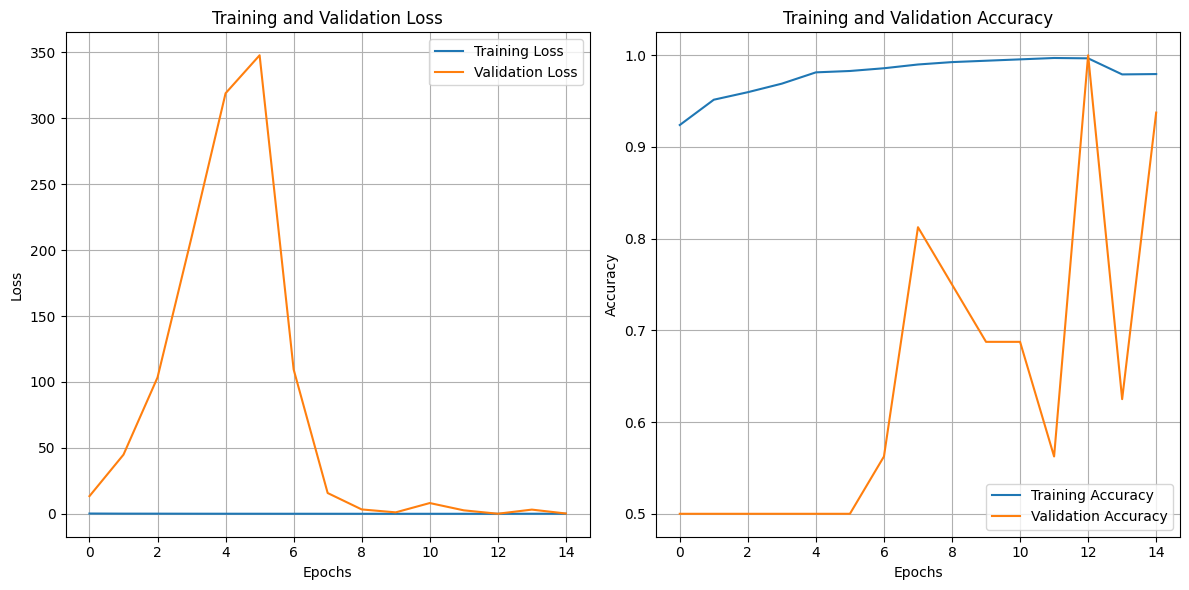


--- Backtesting with a Sample Image ---

Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0305-0001.jpeg
Actual class: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step

Prediction probability (PNEUMONIA): 1.0000
Predicted Class: PNEUMONIA


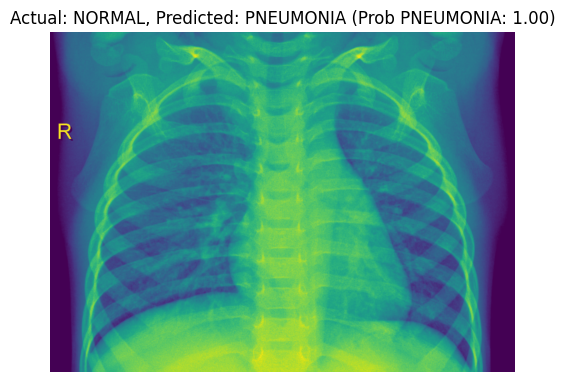


Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg
Actual class: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Prediction probability (PNEUMONIA): 1.0000
Predicted Class: PNEUMONIA


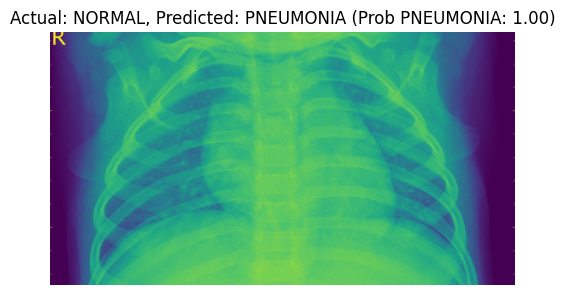


Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/test/PNEUMONIA/person72_virus_133.jpeg
Actual class: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Prediction probability (PNEUMONIA): 1.0000
Predicted Class: PNEUMONIA


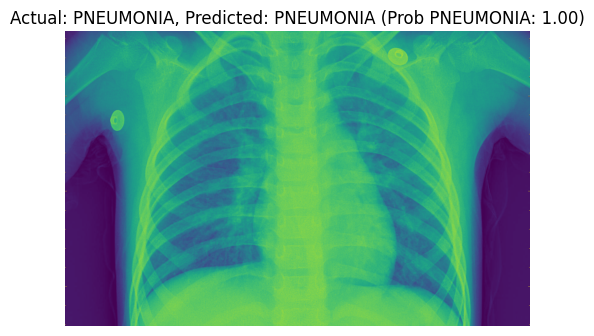

In [ ]:

# # Pneumonia Detection CNN Model Training and Evaluation
#
# This notebook cell demonstrates building, training, and evaluating a Convolutional Neural Network (CNN) model for Pneumonia detection using the extracted dataset.
#
# **Assumptions:**
# - The dataset has been extracted and preprocessed (resized) into `train`, `val`, and `test` directories under the specified `base_dir`.
# - Each subset directory (`train`, `val`, `test`) contains subdirectories named `NORMAL` and `PNEUMONIA` with the corresponding images.
# - Required libraries (`tensorflow`, `matplotlib`, `numpy`, `Pillow`) are installed.

# %%
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# --- Configuration ---

# Set the base directory where your 'train', 'val', and 'test' folders are located.
# Ensure this path is correct based on where you extracted the zip file.
# Based on your previous code, this seems to be the correct path after extraction.
base_dir = "/content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

image_height = 224 # Must match the size images were resized to
image_width = 224  # Must match the size images were resized to
batch_size = 32    # Number of images per batch
epochs = 15        # Number of epochs for training (you can adjust this)


# --- Load Datasets ---

print(f"Loading datasets from: {base_dir}")

# Load training dataset
print("Loading training dataset...")
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',          # Labels are inferred from the directory structure (NORMAL, PNEUMONIA)
    label_mode='binary',        # Binary labels (0 or 1) for binary classification
    image_size=(image_height, image_width),
    interpolation='nearest',    # Interpolation method for resizing
    batch_size=batch_size,
    shuffle=True                # Shuffle training data
)

# Load validation dataset
print("Loading validation dataset...")
val_ds = image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False               # No need to shuffle validation data
)

# Load test dataset
print("Loading test dataset...")
test_ds = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False               # No need to shuffle test data
)

# Get class names (should be ['NORMAL', 'PNEUMONIA'])
class_names = train_ds.class_names
print(f"\nClass names inferred by image_dataset_from_directory: {class_names}")
# Assuming NORMAL is class 0 and PNEUMONIA is class 1

# --- Data Preprocessing for Model Input ---
# Convert images to float32 and normalize pixel values from [0, 255] to [0, 1]

def preprocess(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.float32) # Convert to float32
  image = image / 255.0 # Normalize to [0, 1]
  return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)
test_ds = test_ds.map(preprocess)


# --- Configure datasets for performance ---
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\nDatasets configured for performance and normalized.")


# --- Build the Simple CNN Model ---

def build_simple_cnn(input_shape):
    """
    Builds a simple Convolutional Neural Network model.

    Args:
        input_shape (tuple): The shape of the input images (height, width, channels).

    Returns:
        tf.keras.models.Sequential: The built CNN model.
    """
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25), # Added Dropout for regularization

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Flatten the output for the Dense layers
        Flatten(),

        # Dense Layers (Fully Connected)
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5), # Higher dropout on dense layers

        # Output Layer for Binary Classification
        Dense(1, activation='sigmoid') # 1 unit for binary classification, sigmoid for probability output
    ])
    return model

# Define the input shape based on your resized and normalized images
# Images are now normalized to [0, 1], but the shape remains the same.
image_channels = 3 # Assuming RGB or converting grayscale to 3 channels earlier if needed

input_shape = (image_height, image_width, image_channels)

# Build the model
simple_cnn_model = build_simple_cnn(input_shape)

# Display the model summary
print("\n--- Model Summary ---")
simple_cnn_model.summary()

# --- Compile the Model ---
simple_cnn_model.compile(
    optimizer='adam',           # Optimizer: Adam is a popular choice
    loss='binary_crossentropy', # Loss function for binary classification
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()] # Metrics to monitor
)

print("\nModel compiled.")

# --- Train the Model ---
print(f"\nStarting model training for {epochs} epochs...")

history = simple_cnn_model.fit(
    train_ds,           # Training dataset
    epochs=epochs,      # Number of training epochs
    validation_data=val_ds # Validation dataset
)

print("\nModel training complete.")

# --- Evaluate the Model on Test Data ---
print("\n--- Evaluating Model on Test Data ---")
loss, accuracy, precision, recall, auc = simple_cnn_model.evaluate(test_ds)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test AUC: {auc:.4f}")


# --- Plot Training History ---
print("\n--- Plotting Training History ---")

# Get the loss and metrics from the history object
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# --- Backtesting with a Single Image ---
print("\n--- Backtesting with a Sample Image ---")

# Function to load and preprocess a single image for prediction
def load_and_preprocess_image(image_path, target_size):
    img = Image.open(image_path).convert('RGB') # Ensure image is in RGB format
    img = img.resize(target_size) # Resize the image
    img_array = np.array(img) # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension (1, height, width, channels)
    img_array = img_array.astype('float32') / 255.0 # Normalize pixel values
    return img_array

# Choose a sample image path (replace with an actual path from your test set)
# Example: Pick a random image from the test set
sample_class = random.choice(class_names) # Choose a random class (NORMAL or PNEUMONIA)
sample_class_dir = os.path.join(test_dir, sample_class)

# List images in the chosen directory, ignoring hidden files
sample_image_files = [f for f in os.listdir(sample_class_dir) if os.path.isfile(os.path.join(sample_class_dir, f)) and not f.startswith('.')]

if not sample_image_files:
    print(f"No valid image files found in {sample_class_dir} to sample.")
else:
    # Pick a random image file
    sample_image_file = random.choice(sample_image_files)
    sample_image_path = os.path.join(sample_class_dir, sample_image_file)

    print(f"\nLoading and predicting on sample image: {sample_image_path}")
    print(f"Actual class: {sample_class}")

    # Load and preprocess the image
    processed_image = load_and_preprocess_image(sample_image_path, (image_width, image_height)) # Note: target_size is (width, height) for PIL

    # Make a prediction
    prediction = simple_cnn_model.predict(processed_image)

    # The output layer is sigmoid, so the prediction is a probability
    probability = prediction[0][0] # Get the single probability value

    # Determine the predicted class based on a threshold (e.g., 0.5)
    predicted_class_index = 1 if probability > 0.5 else 0
    predicted_class = class_names[predicted_class_index]

    print(f"\nPrediction probability (PNEUMONIA): {probability:.4f}")
    print(f"Predicted Class: {predicted_class}")

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    img_to_display = Image.open(sample_image_path)
    plt.imshow(img_to_display)
    plt.title(f"Actual: {sample_class}, Predicted: {predicted_class} (Prob PNEUMONIA: {probability:.2f})")
    plt.axis('off')
    plt.show()

    # Optional: Load and test a NORMAL image
    try:
        normal_sample_dir = os.path.join(test_dir, "NORMAL")
        normal_sample_files = [f for f in os.listdir(normal_sample_dir) if os.path.isfile(os.path.join(normal_sample_dir, f)) and not f.startswith('.')]
        if normal_sample_files:
            sample_image_file = random.choice(normal_sample_files)
            sample_image_path = os.path.join(normal_sample_dir, sample_image_file)
            print(f"\nLoading and predicting on sample image: {sample_image_path}")
            print(f"Actual class: NORMAL")

            processed_image = load_and_preprocess_image(sample_image_path, (image_width, image_height))
            prediction = simple_cnn_model.predict(processed_image)
            probability = prediction[0][0]
            predicted_class_index = 1 if probability > 0.5 else 0
            predicted_class = class_names[predicted_class_index]

            print(f"\nPrediction probability (PNEUMONIA): {probability:.4f}")
            print(f"Predicted Class: {predicted_class}")

            plt.figure(figsize=(6, 6))
            img_to_display = Image.open(sample_image_path)
            plt.imshow(img_to_display)
            plt.title(f"Actual: NORMAL, Predicted: {predicted_class} (Prob PNEUMONIA: {probability:.2f})")
            plt.axis('off')
            plt.show()
        else:
            print("No valid NORMAL images found in test set for additional sample.")
    except Exception as e:
        print(f"Error processing additional sample image: {e}")

    # Optional: Load and test a PNEUMONIA image
    try:
        pneumonia_sample_dir = os.path.join(test_dir, "PNEUMONIA")
        pneumonia_sample_files = [f for f in os.listdir(pneumonia_sample_dir) if os.path.isfile(os.path.join(pneumonia_sample_dir, f)) and not f.startswith('.')]
        if pneumonia_sample_files:
            sample_image_file = random.choice(pneumonia_sample_files)
            sample_image_path = os.path.join(pneumonia_sample_dir, sample_image_file)
            print(f"\nLoading and predicting on sample image: {sample_image_path}")
            print(f"Actual class: PNEUMONIA")

            processed_image = load_and_preprocess_image(sample_image_path, (image_width, image_height))
            prediction = simple_cnn_model.predict(processed_image)
            probability = prediction[0][0]
            predicted_class_index = 1 if probability > 0.5 else 0
            predicted_class = class_names[predicted_class_index]

            print(f"\nPrediction probability (PNEUMONIA): {probability:.4f}")
            print(f"Predicted Class: {predicted_class}")

            plt.figure(figsize=(6, 6))
            img_to_display = Image.open(sample_image_path)
            plt.imshow(img_to_display)
            plt.title(f"Actual: PNEUMONIA, Predicted: {predicted_class} (Prob PNEUMONIA: {probability:.2f})")
            plt.axis('off')
            plt.show()
        else:
             print("No valid PNEUMONIA images found in test set for additional sample.")
    except Exception as e:
        print(f"Error processing additional sample image: {e}")

Loading datasets from: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/Pneumonia/chest_xray
Loading training dataset...
Found 5216 files belonging to 2 classes.
Loading validation dataset...
Found 16 files belonging to 2 classes.
Loading test dataset...
Found 624 files belonging to 2 classes.

Class names inferred by image_dataset_from_directory: ['NORMAL', 'PNEUMONIA']

Datasets configured for performance, normalized.
Data augmentation layers are included in the model definition.

--- Model Summary ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model compiled.

Early Stopping configured to monitor 'val_loss' with patience=7.

Starting model training (max 10 epochs, with Early Stopping)...
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 185ms/step - accuracy: 0.7785 - auc_4: 0.8559 - loss: 0.5833 - precision_4: 0.9128 - recall_4: 0.7763 - val_accuracy: 0.5000 - val_auc_4: 0.5000 - val_loss: 106.7490 - val_precision_4: 0.5000 - val_recall_4: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.9144 - auc_4: 0.9621 - loss: 0.2169 - precision_4: 0.9396 - recall_4: 0.9461 - val_accuracy: 0.5000 - val_auc_4: 0.5000 - val_loss: 360.3715 - val_precision_4: 0.5000 - val_recall_4: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 176ms/step - accuracy: 0.9262 - auc_4: 0.9604 - loss: 0.2144 - precision_4: 0.9485 - recall_4: 0.9531 - val_accuracy: 0.5000 - val_auc_4: 0.5000 - val_loss: 29.1557 - val_precision_4: 0.5000 - val_recall_4: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 177ms/step - accuracy: 0.9110 - 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,429,381 (589.10 MB)

 Trainable params: 51,475,969 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 102,951,940 (392.73 MB)


--- Evaluating Model on Test Data ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8741 - auc_4: 0.6229 - loss: 0.4111 - precision_4: 0.5686 - recall_4: 0.5139

Test Loss: 0.4782
Test Accuracy: 0.7997
Test Precision: 0.9373
Test Recall: 0.7282
Test AUC: 0.9161

--- Plotting Training History ---


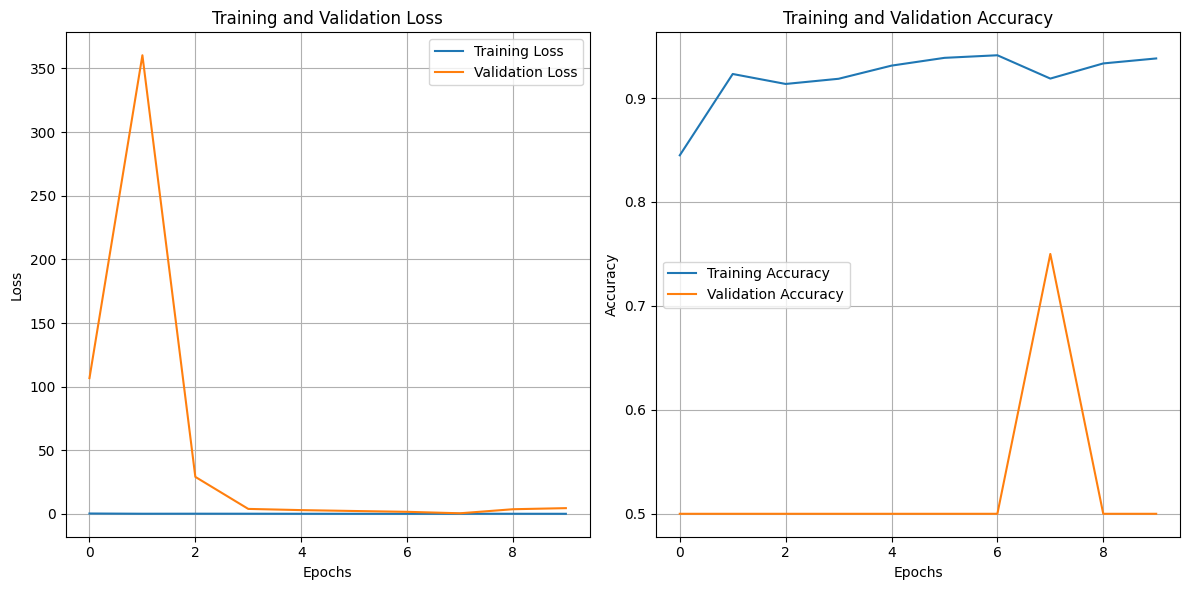


--- Backtesting with Sample Images ---

Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/Pneumonia/chest_xray/test/NORMAL/IM-0033-0001-0002.jpeg
Actual class: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Prediction probability (PNEUMONIA): 0.0000
Predicted Class: NORMAL


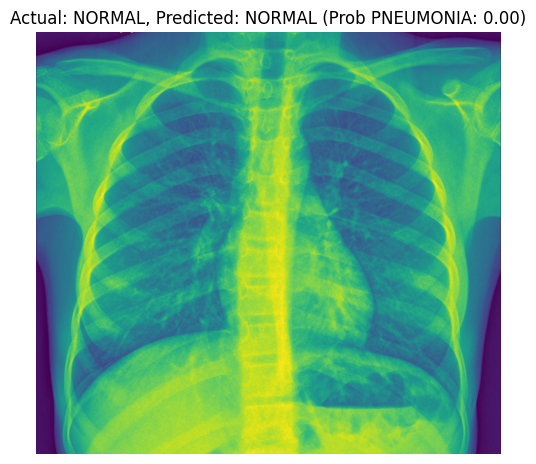


Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/Pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0120-0001.jpeg
Actual class: NORMAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction probability (PNEUMONIA): 0.0000
Predicted Class: NORMAL


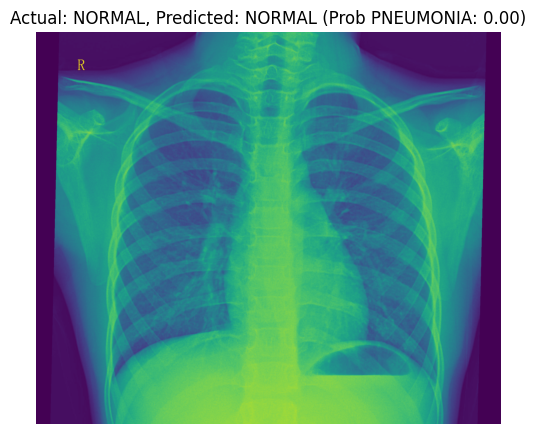


Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/Pneumonia/chest_xray/test/PNEUMONIA/person78_bacteria_386.jpeg
Actual class: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction probability (PNEUMONIA): 1.0000
Predicted Class: PNEUMONIA


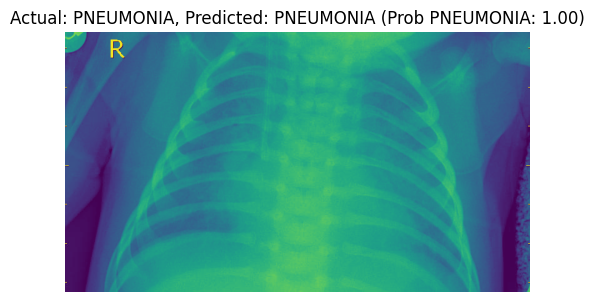


Loading and predicting on sample image: /content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/Pneumonia/chest_xray/test/PNEUMONIA/person147_bacteria_711.jpeg
Actual class: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction probability (PNEUMONIA): 1.0000
Predicted Class: PNEUMONIA


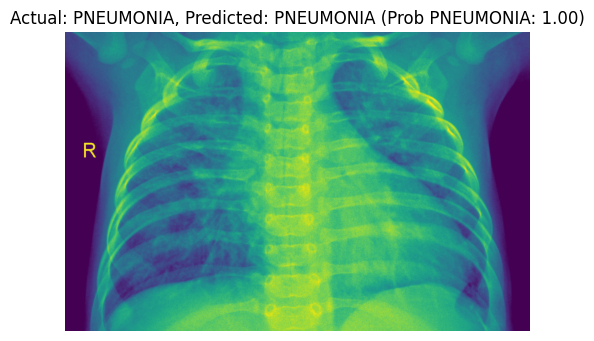

In [ ]:

# # Pneumonia Detection CNN Model Training and Evaluation (with Augmentation & Early Stopping)
#
# This notebook cell demonstrates building, training, and evaluating a Convolutional Neural Network (CNN) model for Pneumonia detection, now incorporating Data Augmentation and Early Stopping to combat overfitting.
#
# **Assumptions:**
# - The dataset has been extracted and preprocessed (resized) into `train`, `val`, and `test` directories under the specified `base_dir`.
# - Each subset directory (`train`, `val`, `test`) contains subdirectories named `NORMAL` and `PNEUMONIA` with the corresponding images.
# - Required libraries (`tensorflow`, `matplotlib`, `numpy`, `Pillow`) are installed.

# %%
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random # Still needed for sample image selection
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
from tensorflow.keras import layers # Import layers for data augmentation

# --- Configuration ---

# Set the base directory where your 'train', 'val', and 'test' folders are located.
base_dir = "/content/Pneumonia_extracted/Pneumonia/chest_xray/Pneumonia/chest_xray/Pneumonia/chest_xray" # Corrected base_dir

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

image_height = 224 # Must match the size images were resized to
image_width = 224  # Must match the size images were resized to
batch_size = 32    # Number of images per batch
epochs = 10      # Set a higher max epochs, Early Stopping will manage the actual number

# --- Load Datasets ---

print(f"Loading datasets from: {base_dir}")

# Load training dataset
print("Loading training dataset...")
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Load validation dataset
print("Loading validation dataset...")
val_ds = image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Load test dataset
print("Loading test dataset...")
test_ds = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names
print(f"\nClass names inferred by image_dataset_from_directory: {class_names}")


# --- Data Preprocessing and Augmentation ---

# Augmentation layers - only applied to the training data
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"), # Randomly flip images horizontally
  layers.RandomRotation(0.1),      # Randomly rotate images by up to 10%
  layers.RandomZoom(0.1),          # Randomly zoom into images by up to 10%
  # layers.RandomTranslation(height_factor=0.1, width_factor=0.1), # Optional: Randomly shift images
  # layers.RandomContrast(0.1), # Optional: Randomly adjust contrast
], name="data_augmentation")


# Preprocessing function including normalization
def preprocess_and_augment(image, label):
  # Apply augmentation only during training (when this function is called on train_ds)
  # Keras preprocessing layers automatically handle this when used within the model
  # or applied to the training dataset before caching/prefetching.
  # We'll apply it *after* normalization for this setup, which is common.
  image = tf.image.convert_image_dtype(image, dtype=tf.float32) # Convert to float32
  image = image / 255.0 # Normalize to [0, 1]
  # Augmentation layers are added *inside* the model definition below
  return image, label

# Apply only normalization to all datasets initially
train_ds = train_ds.map(preprocess_and_augment) # This map only does normalization as augment is in model
val_ds = val_ds.map(preprocess_and_augment)
test_ds = test_ds.map(preprocess_and_augment)


# --- Configure datasets for performance ---
AUTOTUNE = tf.data.AUTOTUNE

# Add caching and prefetching for performance
# Augmentation should ideally happen *after* caching for efficiency, but *before* prefetching.
# However, when using Sequential layers for augmentation, it's often placed
# at the beginning of the model itself, which is handled efficiently by TensorFlow.
# We'll put caching/prefetching here for the normalized data.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


print("\nDatasets configured for performance, normalized.")
print("Data augmentation layers are included in the model definition.")


# --- Build the Simple CNN Model (now including Data Augmentation) ---

def build_simple_cnn(input_shape, data_augmentation_layers):
    """
    Builds a simple Convolutional Neural Network model including data augmentation.

    Args:
        input_shape (tuple): The shape of the input images (height, width, channels).
        data_augmentation_layers (tf.keras.Sequential): A Sequential model containing
                                                         the data augmentation layers.

    Returns:
        tf.keras.models.Sequential: The built CNN model.
    """
    model = Sequential([
        # Add the data augmentation layers *at the beginning* of the model.
        # These are active only during training.
        data_augmentation_layers,

        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Flatten the output for the Dense layers
        Flatten(),

        # Dense Layers (Fully Connected)
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Output Layer for Binary Classification
        Dense(1, activation='sigmoid')
    ])
    return model

# Define the input shape
image_channels = 3 # Assuming RGB

# The input shape to the *first Conv2D layer* is the image size *after* augmentation.
# However, Keras handles the shape propagation. We just need the shape of the data
# that enters the augmentation layer, which is (image_height, image_width, image_channels).
input_shape = (image_height, image_width, image_channels)

# Build the model, passing the augmentation layers
simple_cnn_model = build_simple_cnn(input_shape, data_augmentation)

# Display the model summary
print("\n--- Model Summary ---")
simple_cnn_model.summary()

# --- Compile the Model ---
simple_cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

print("\nModel compiled.")

# --- Define Early Stopping Callback ---
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=7,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)
print(f"\nEarly Stopping configured to monitor 'val_loss' with patience={early_stopping.patience}.")


# --- Train the Model ---
print(f"\nStarting model training (max {epochs} epochs, with Early Stopping)...")

history = simple_cnn_model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[early_stopping] # Pass the Early Stopping callback
)

print("\nModel training complete.")
actual_epochs_run = len(history.history['loss'])
print(f"Training ran for {actual_epochs_run} epochs (due to Early Stopping).")

print("\n--- Model Summary After Training ---")
simple_cnn_model.summary()


# --- Evaluate the Model on Test Data ---
print("\n--- Evaluating Model on Test Data ---")
# The data augmentation layers are automatically inactive during evaluation and prediction.
loss, accuracy, precision, recall, auc = simple_cnn_model.evaluate(test_ds)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test AUC: {auc:.4f}")


# --- Plot Training History ---
print("\n--- Plotting Training History ---")

history_dict = history.history
# Use the actual number of epochs the training ran for plotting
epochs_range = range(actual_epochs_run)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# --- Backtesting with a Single Image ---
print("\n--- Backtesting with Sample Images ---")

# Function to load and preprocess a single image for prediction
def load_and_preprocess_image(image_path, target_size):
    # Open the image using PIL
    img = Image.open(image_path)
    # Ensure image is in RGB format (handle grayscale or other modes)
    img = img.convert('RGB')
    # Resize the image using the specified target_size (width, height)
    img = img.resize(target_size)
    # Convert PIL image to numpy array
    img_array = np.array(img)
    # Add a batch dimension (required for model input)
    img_array = np.expand_dims(img_array, axis=0) # Shape becomes (1, height, width, channels)
    # Normalize pixel values from [0, 255] to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Function to perform prediction and display result for a single image
def predict_and_display_sample(image_path, model, class_names, target_size):
    if not os.path.exists(image_path):
        print(f"Sample image not found at {image_path}")
        return

    print(f"\nLoading and predicting on sample image: {image_path}")

    # Determine the actual class from the path
    actual_class = os.path.basename(os.path.dirname(image_path))
    print(f"Actual class: {actual_class}")

    try:
        # Load and preprocess the image
        processed_image = load_and_preprocess_image(image_path, (target_size[1], target_size[0])) # PIL resize expects (width, height)

        # Make a prediction
        prediction = model.predict(processed_image)

        # The output is a probability from the sigmoid activation
        probability = prediction[0][0] # Get the single probability value for the positive class (PNEUMONIA)

        # Determine the predicted class based on a threshold (e.g., 0.5)
        # Assumes class_names[1] is 'PNEUMONIA' and class_names[0] is 'NORMAL'
        predicted_class_index = 1 if probability > 0.5 else 0
        predicted_class = class_names[predicted_class_index]

        print(f"Prediction probability ({class_names[1]}): {probability:.4f}")
        print(f"Predicted Class: {predicted_class}")

        # Display the image and prediction
        plt.figure(figsize=(6, 6))
        img_to_display = Image.open(image_path)
        plt.imshow(img_to_display)
        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class} (Prob {class_names[1]}: {probability:.2f})")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing sample image {image_path}: {e}")


# --- Select and predict on sample images ---
# Choose sample image paths from the test set
num_samples_per_class = 2 # Display 2 images per class

for cls in class_names:
    class_test_dir = os.path.join(test_dir, cls)
    if os.path.isdir(class_test_dir):
        # List all image files in the directory
        image_files = [f for f in os.listdir(class_test_dir) if os.path.isfile(os.path.join(class_test_dir, f)) and not f.startswith('.')]
        # Select random samples
        sample_images = random.sample(image_files, min(num_samples_per_class, len(image_files)))

        for img_file in sample_images:
            sample_image_path = os.path.join(class_test_dir, img_file)
            # Perform prediction and display
            predict_and_display_sample(sample_image_path, simple_cnn_model, class_names, (image_width, image_height))
    else:
        print(f"Test directory for class {cls} not found at {class_test_dir}")


--- Plotting Training Loss History ---


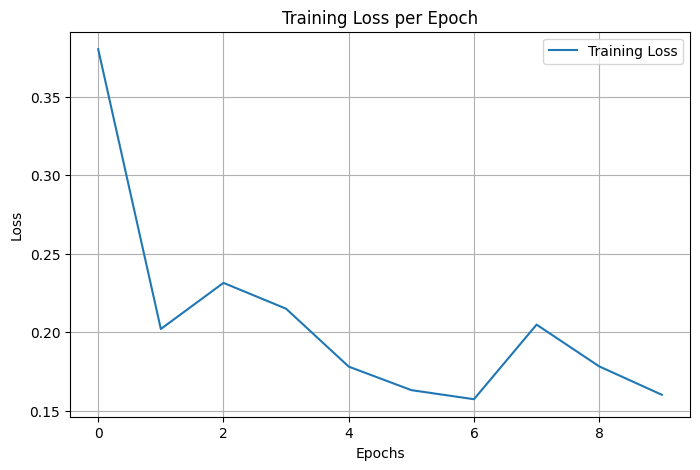

In [ ]:
# --- Plot Training History (Only Training Loss) ---
print("\n--- Plotting Training Loss History ---")

# Get the history dictionary
history_dict = history.history

# Get the training loss values
train_loss = history_dict['loss']

# Get the range of epochs the training ran for
actual_epochs_run = len(train_loss) # Or len(history_dict['loss']) or from earlier variable
epochs_range = range(actual_epochs_run)

# Create a figure and an axes
plt.figure(figsize=(8, 5)) # Adjust figure size as needed

# Plot the training loss
plt.plot(epochs_range, train_loss, label='Training Loss')

# Set the title and labels
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# --- Backtesting with Sample Images ---
# ... (rest of your code for evaluation and backtesting) ...

In [ ]:
import os
import numpy as np
from sklearn.utils import class_weight # Make sure scikit-learn is installed (pip install scikit-learn)

# Assuming base_dir is set to your extracted dataset directory from previous steps
base_dir = "/content/weight/Pneumonia/chest_xray"
# Please ensure base_dir is correctly defined before running this cell.

# --- Define Directories ---
train_dir = os.path.join(base_dir, "train")
normal_train_dir = os.path.join(train_dir, "NORMAL")
pneumonia_train_dir = os.path.join(train_dir, "PNEUMONIA")

# --- Get image counts ---
print(f"Counting images in training directory: {train_dir}")

# Check if directories exist
if not os.path.isdir(normal_train_dir):
    print(f"Error: NORMAL training directory not found at {normal_train_dir}")
    num_normal_train = 0
else:
    # Filter for files, ignoring directories or hidden files
    normal_images = [f for f in os.listdir(normal_train_dir) if os.path.isfile(os.path.join(normal_train_dir, f)) and not f.startswith('.')]
    num_normal_train = len(normal_images)

if not os.path.isdir(pneumonia_train_dir):
    print(f"Error: PNEUMONIA training directory not found at {pneumonia_train_dir}")
    num_pneumonia_train = 0
else:
    # Filter for files, ignoring directories or hidden files
    pneumonia_images = [f for f in os.listdir(pneumonia_train_dir) if os.path.isfile(os.path.join(pneumonia_train_dir, f)) and not f.startswith('.')]
    num_pneumonia_train = len(pneumonia_images)

print(f"\nTrain set counts:")
print(f"  NORMAL: {num_normal_train} images")
print(f"  PNEUMONIA: {num_pneumonia_train} images")

# --- Calculate Class Weights ---
# We need a list of labels corresponding to the training data.
# image_dataset_from_directory assigns labels alphabetically by default:
# NORMAL will be 0, PNEUMONIA will be 1.
# We'll use these expected indices (0 and 1).

# Create a dummy array of labels representing the class distribution
if num_normal_train > 0 or num_pneumonia_train > 0:
    labels = np.array([0] * num_normal_train + [1] * num_pneumonia_train)

    # Calculate weights using scikit-learn's compute_class_weight
    # 'balanced' mode automatically adjusts weights inversely proportional to class frequencies.
    try:
        class_weights_array = class_weight.compute_class_weight(
            class_weight='balanced',
            classes=np.unique(labels),
            y=labels
        )

        # Convert the weights array into a dictionary mapping class index to weight
        # Ensure the keys (0 and 1) correspond to your class indices
        class_weight_dict = {0: class_weights_array[0], 1: class_weights_array[1]}


        print("\nCalculated Class Weights (for model.fit):")
        print(class_weight_dict)
        # Expected output will be something like: {0: weight_for_normal, 1: weight_for_pneumonia}
        # weight_for_normal should be higher than weight_for_pneumonia if NORMAL is the minority class.

    except ValueError as e:
        print(f"\nCould not calculate class weights. Error: {e}")
        print("This might happen if one of the classes has zero samples.")
        class_weight_dict = None # Set to None if calculation fails

else:
    print("\nNo images found in training directories. Cannot calculate class weights.")
    class_weight_dict = None

# 'class_weight_dict' now holds the weights that you can pass to your model.fit() call.

Counting images in training directory: /content/weight/Pneumonia/chest_xray/train

Train set counts:
  NORMAL: 1341 images
  PNEUMONIA: 3875 images

Calculated Class Weights (for model.fit):
{0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}


Counting images in training directory: /content/weight/Pneumonia/chest_xray/train

Train set counts:
  NORMAL: 1341 images
  PNEUMONIA: 3875 images

Calculated Class Weights (for model.fit):
{0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}

Loading datasets from: /content/weight/Pneumonia/chest_xray
Loading training dataset...
Found 5216 files belonging to 2 classes.

Class names inferred by image_dataset_from_directory: ['NORMAL', 'PNEUMONIA']
Loading validation dataset...
Found 16 files belonging to 2 classes.
Loading test dataset...
Found 624 files belonging to 2 classes.

Training dataset configured for performance.
Validation dataset configured for performance.
Test dataset configured for performance.

--- Model Summary ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model compiled.

Starting model training for 10 epochs...
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 184ms/step - accuracy: 0.7692 - auc_7: 0.8834 - loss: 0.5182 - precision_7: 0.9434 - recall_7: 0.7387 - val_accuracy: 0.5000 - val_auc_7: 0.5000 - val_loss: 24.1857 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 177ms/step - accuracy: 0.8966 - auc_7: 0.9675 - loss: 0.2360 - precision_7: 0.9713 - recall_7: 0.8870 - val_accuracy: 0.5000 - val_auc_7: 0.5000 - val_loss: 4.5993 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.9100 - auc_7: 0.9665 - loss: 0.2349 - precision_7: 0.9701 - recall_7: 0.9075 - val_accuracy: 0.5000 - val_auc_7: 0.5000 - val_loss: 50.7407 - val_precision_7: 0.5000 - val_recall_7: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.9285 - auc_7: 0.9783 - loss: 0.1867 - precision_7: 0.9773 - recall_7: 0.9255 - val_

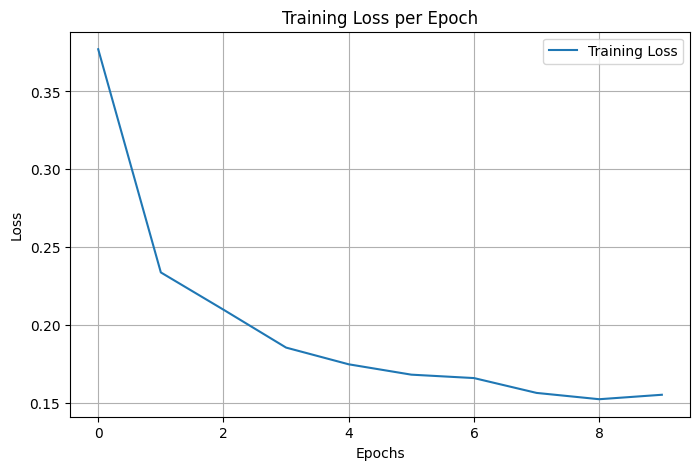

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.utils import class_weight # Import for calculating weights

# --- Configuration ---

# Set the base directory where your 'train', 'val', and 'test' folders are located.
# !!! IMPORTANT: Set this to the correct path where you extracted your dataset.
base_dir = "/content/weight/Pneumonia/chest_xray" # This should be the directory containing 'train', 'val', 'test'

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

image_height = 224 # Must match the size images were resized to
image_width = 224  # Must match the size images were resized to
batch_size = 32    # Number of images per batch
epochs = 10        # Number of epochs for training

# --- Calculate Class Weights ---

print(f"Counting images in training directory: {train_dir}")

# Initialize counts to 0 in case directories don't exist
num_normal_train = 0
num_pneumonia_train = 0
class_weight_dict = None # Initialize class_weight_dict

try:
    # Define specific class directories within the training directory
    normal_train_dir = os.path.join(train_dir, "NORMAL")
    pneumonia_train_dir = os.path.join(train_dir, "PNEUMONIA")

    # Check if directories exist and count images
    if os.path.isdir(normal_train_dir):
        normal_images = [f for f in os.listdir(normal_train_dir) if os.path.isfile(os.path.join(normal_train_dir, f)) and not f.startswith('.')]
        num_normal_train = len(normal_images)
    else:
        print(f"Warning: NORMAL training directory not found at {normal_train_dir}")

    if os.path.isdir(pneumonia_train_dir):
        pneumonia_images = [f for f in os.listdir(pneumonia_train_dir) if os.path.isfile(os.path.join(pneumonia_train_dir, f)) and not f.startswith('.')]
        num_pneumonia_train = len(pneumonia_images)
    else:
        print(f"Warning: PNEUMONIA training directory not found at {pneumonia_train_dir}")

    print(f"\nTrain set counts:")
    print(f"  NORMAL: {num_normal_train} images")
    print(f"  PNEUMONIA: {num_pneumonia_train} images")

    # Calculate weights only if there are images to train on
    if num_normal_train > 0 or num_pneumonia_train > 0:
        # Create a dummy array of labels representing the class distribution
        # image_dataset_from_directory assigns labels alphabetically: NORMAL=0, PNEUMONIA=1
        labels = np.array([0] * num_normal_train + [1] * num_pneumonia_train)

        # Calculate weights using scikit-learn's compute_class_weight
        class_weights_array = class_weight.compute_class_weight(
            class_weight='balanced',
            classes=np.unique(labels),
            y=labels
        )

        # Convert to dictionary {class_index: weight}
        # Ensure keys match the indices assigned by image_dataset_from_directory
        class_weight_dict = {0: class_weights_array[0], 1: class_weights_array[1]}

        print("\nCalculated Class Weights (for model.fit):")
        print(class_weight_dict)

    else:
        print("\nNo images found in training directories. Skipping class weight calculation.")

except Exception as e:
    print(f"\nError during class weight calculation: {e}")
    class_weight_dict = None # Ensure it's None if an error occurs


# --- Load Datasets ---

print(f"\nLoading datasets from: {base_dir}")

# Load training dataset
print("Loading training dataset...")
# Include checks for directory existence before loading
if os.path.isdir(train_dir):
    train_ds = image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='binary',
        image_size=(image_height, image_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True
    )
    class_names = train_ds.class_names
    print(f"\nClass names inferred by image_dataset_from_directory: {class_names}")
else:
    print(f"Error: Training directory not found at {train_dir}. Cannot load training data.")
    train_ds = None # Set to None if directory not found

# Load validation dataset
print("Loading validation dataset...")
if os.path.isdir(val_dir):
    val_ds = image_dataset_from_directory(
        val_dir,
        labels='inferred',
        label_mode='binary',
        image_size=(image_height, image_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False
    )
else:
    print(f"Warning: Validation directory not found at {val_dir}. Validation will be skipped during training.")
    val_ds = None # Set to None if directory not found

# Load test dataset
print("Loading test dataset...")
if os.path.isdir(test_dir):
    test_ds = image_dataset_from_directory(
        test_dir,
        labels='inferred',
        label_mode='binary',
        image_size=(image_height, image_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False
    )
else:
    print(f"Warning: Test directory not found at {test_dir}. Test evaluation will be skipped.")
    test_ds = None # Set to None if directory not found


# --- Data Preprocessing and Augmentation ---

# Augmentation layers - only applied to the training data
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
], name="data_augmentation")

# Preprocessing function including normalization
def preprocess(image, label):
  # Convert to float32 and normalize pixel values to [0, 1]
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = image / 255.0
  return image, label

# Apply normalization to all datasets
if train_ds:
    train_ds = train_ds.map(preprocess)
if val_ds:
    val_ds = val_ds.map(preprocess)
if test_ds:
    test_ds = test_ds.map(preprocess)


# --- Configure datasets for performance ---
AUTOTUNE = tf.data.AUTOTUNE

# Add caching and prefetching for performance
# Augmentation is handled by the model layers
if train_ds:
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    print("\nTraining dataset configured for performance.")
else:
     print("\nTraining dataset not loaded, performance configuration skipped.")

if val_ds:
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    print("Validation dataset configured for performance.")
else:
    print("Validation dataset not loaded, performance configuration skipped.")

if test_ds:
    test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
    print("Test dataset configured for performance.")
else:
    print("Test dataset not loaded, performance configuration skipped.")


# --- Build the Simple CNN Model (including Data Augmentation) ---

def build_simple_cnn(input_shape, data_augmentation_layers):
    """
    Builds a simple Convolutional Neural Network model including data augmentation.
    """
    model = Sequential([
        # Add the data augmentation layers at the beginning of the model.
        data_augmentation_layers,

        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Flatten the output for the Dense layers
        Flatten(),

        # Dense Layers (Fully Connected)
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Output Layer for Binary Classification
        Dense(1, activation='sigmoid') # 1 unit for binary classification, sigmoid for probability output
    ])
    return model

# Define the input shape
image_channels = 3 # Assuming RGB

input_shape = (image_height, image_width, image_channels)

# Build the model
simple_cnn_model = build_simple_cnn(input_shape, data_augmentation)

# Display the model summary
print("\n--- Model Summary ---")
simple_cnn_model.summary()

# --- Compile the Model ---
simple_cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

print("\nModel compiled.")

# --- Train the Model ---
print(f"\nStarting model training for {epochs} epochs...")

# Train the model only if the training dataset was loaded successfully
if train_ds:
    # Set up Early Stopping (optional but recommended)
    # Monitors validation loss and stops if it doesn't improve for 'patience' epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = simple_cnn_model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds, # Use validation data if loaded
        class_weight=class_weight_dict, # Apply class weights if calculated
        callbacks=[early_stopping] if val_ds else [] # Add callback only if validation data exists
    )

    print("\nModel training complete.")

    # --- Plot Training Loss ---
    print("\n--- Plotting Training Loss ---")

    # Get the loss from the history object
    history_dict = history.history
    train_loss = history_dict['loss']
    epochs_range = range(len(train_loss)) # Use the actual number of trained epochs

    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.title('Training Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("\nModel training skipped because the training dataset could not be loaded.")

 --- (Optional) Evaluate the Model on Test Data ---
# You can uncomment this section if you want to evaluate on the test set after training
 print("\n--- Evaluating Model on Test Data ---")
# if test_ds:
#     loss, accuracy, precision, recall, auc = simple_cnn_model.evaluate(test_ds)
#
     print(f"\nTest Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
     print(f"Test Precision: {precision:.4f}")
     print(f"Test Recall: {recall:.4f}")
     print(f"Test AUC: {auc:.4f}")
# else:
#      print("\nTest evaluation skipped because the test dataset could not be loaded.")